# Explore Exercises

In [3]:
import pandas as pd

import matplotlib.pyplot as plt

import statsmodels.api as sm

import prepare

In [4]:
plt.rc('figure', figsize=(16, 9))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

## Using your store items data you prepped in lesson 2 exercises:

In [5]:
sales = prepare.wrangle_sales()
sales

,item,sale_amount,sale_id,store,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day_of_week,sales_total,sales_diff
sale_date,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,1,10.92,0.00
2013-01-02 00:00:00+00:00,1,11.0,2,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,2,9.24,-1.68
2013-01-03 00:00:00+00:00,1,14.0,3,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,3,11.76,2.52
2013-01-04 00:00:00+00:00,1,13.0,4,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,4,10.92,-0.84
2013-01-05 00:00:00+00:00,1,10.0,5,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,5,8.40,-2.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27 00:00:00+00:00,50,63.0,912996,10,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221,8503 NW Military Hwy,San Antonio,TX,78231,12,2,327.60,114.40
2017-12-28 00:00:00+00:00,50,59.0,912997,10,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221,8503 NW Military Hwy,San Antonio,TX,78231,12,3,306.80,-20.80
2017-12-29 00:00:00+00:00,50,74.0,912998,10,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221,8503 NW Military Hwy,San Antonio,TX,78231,12,4,384.80,78.00


### Split your data into train and test and validate your splits by plotting X_train and y_train.

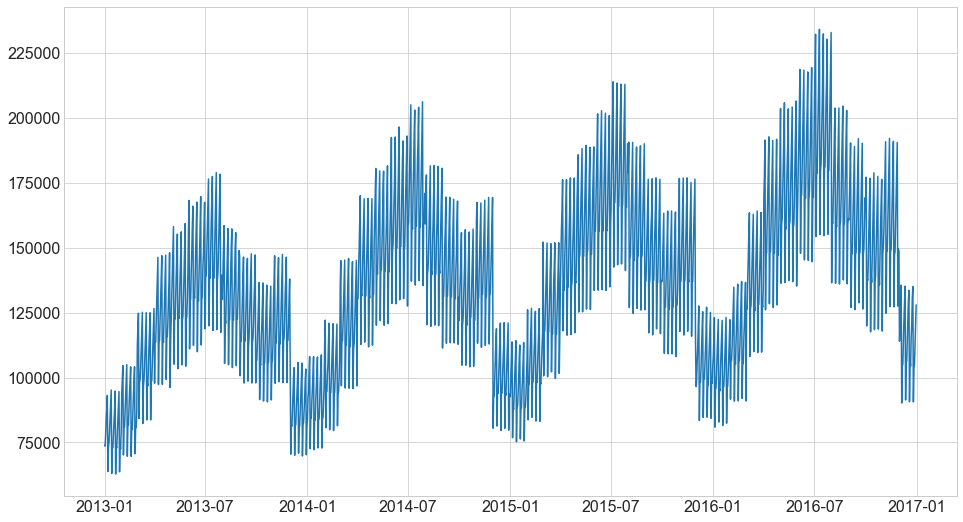

In [23]:
sales = sales.resample('D').sum()
train = sales[:'2016']
test = sales['2017']

plt.plot(train.index, train.sales_total)

### Plot the weekly average & the 7-day moving average. Compare the 2 plots.

Text(0.5, 1.0, 'Weekly Average of Total Sales')

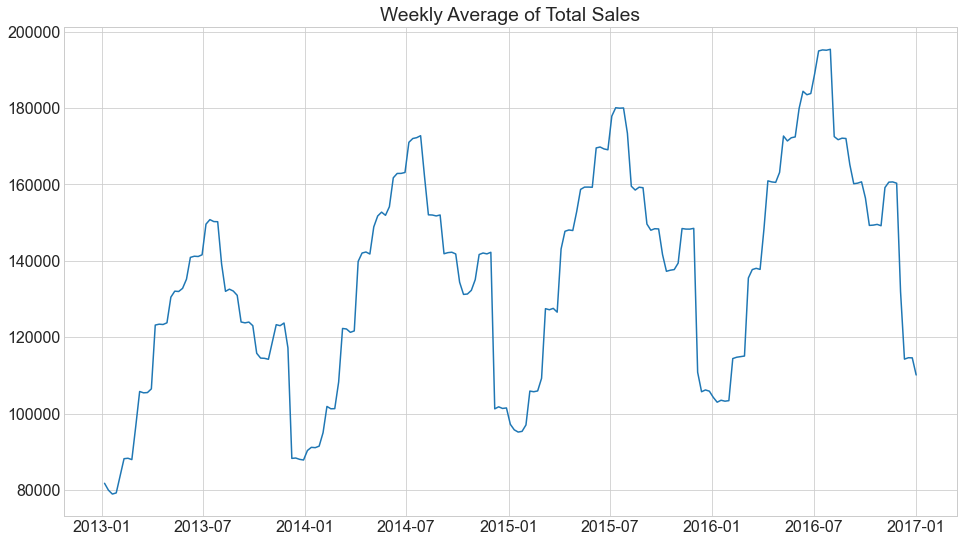

In [24]:
train_week = train.resample('W').mean()

plt.plot(train_week.index, train_week.sales_total)
plt.title('Weekly Average of Total Sales')

Text(0.5, 1.0, '7-Day Rolling Average')

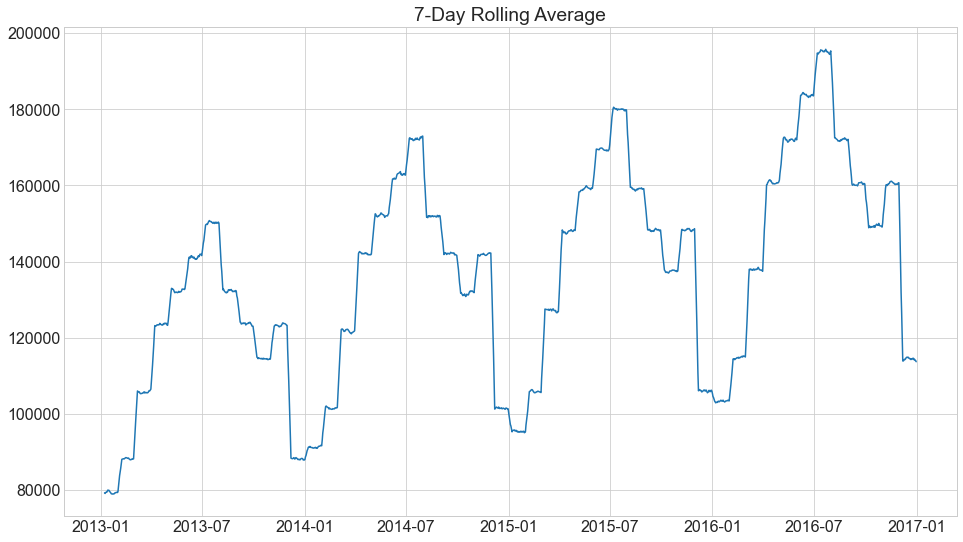

In [25]:
train_rolling_week = train.resample('D').sum().rolling(7).mean()

plt.plot(train_rolling_week.index, train_rolling_week.sales_total)
plt.title('7-Day Rolling Average')

### Plot the daily difference. Observe whether usage seems to vary drastically from day to day or has more of a smooth transition.

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


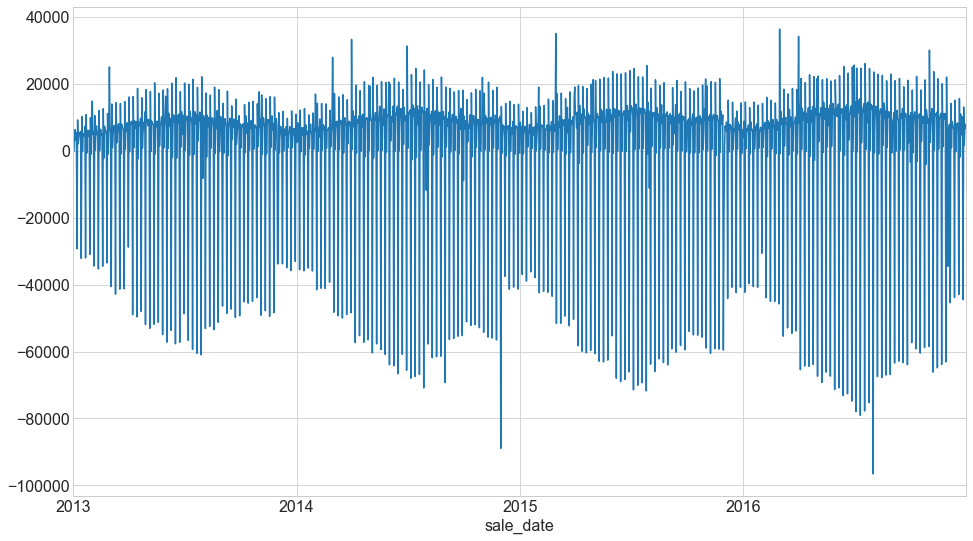

In [27]:
train.diff(periods=1).sales_total.plot()

### Plot a time series decomposition.

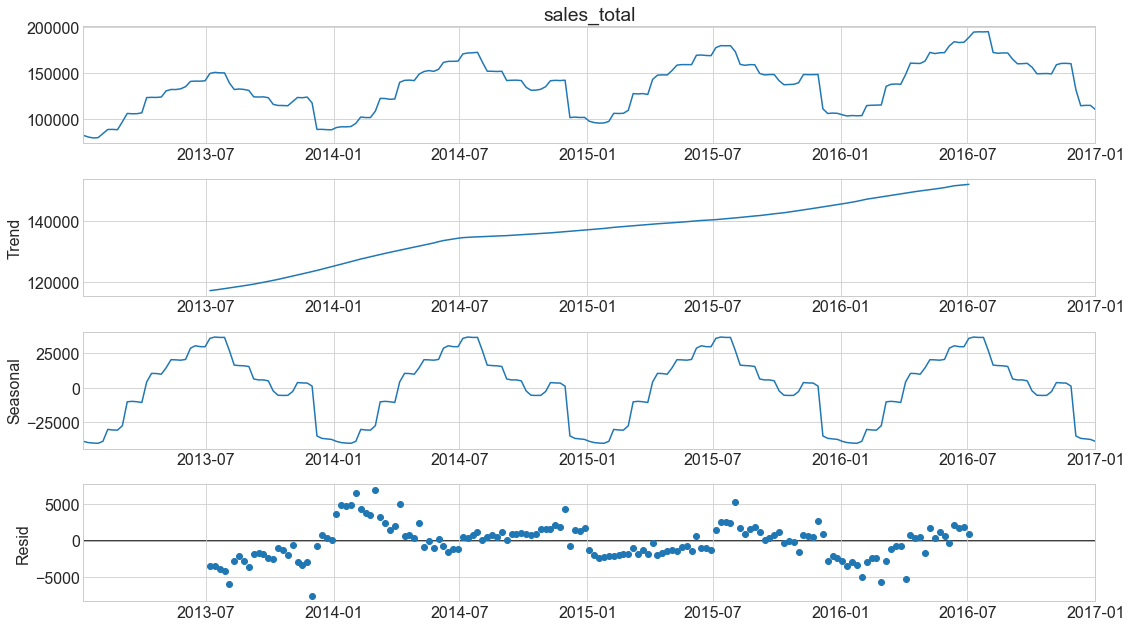

In [37]:
decomposition = sm.tsa.seasonal_decompose(train.resample('W').mean().sales_total)
fig = decomposition.plot()
plt.show()

### Run a lag correlation.

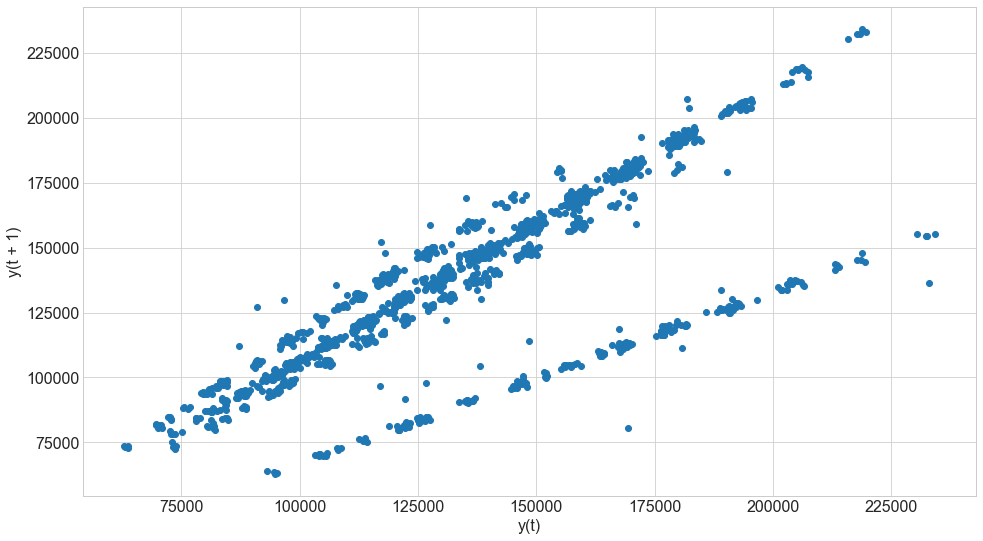

In [41]:
pd.plotting.lag_plot(train.sales_total)

## Using your OPS data you prepped in lesson 2 exercises:

In [42]:
power = prepare.wrangle_german_power()
power

,Consumption,Wind,Solar,Wind+Solar,Month,Year
Date,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,1,2006
2006-01-02,1380.52100,NaN,NaN,NaN,1,2006
2006-01-03,1442.53300,NaN,NaN,NaN,1,2006
2006-01-04,1457.21700,NaN,NaN,NaN,1,2006
2006-01-05,1477.13100,NaN,NaN,NaN,1,2006
...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,12,2017
2017-12-28,1299.86398,506.424,14.162,520.586,12,2017
2017-12-29,1295.08753,584.277,29.854,614.131,12,2017


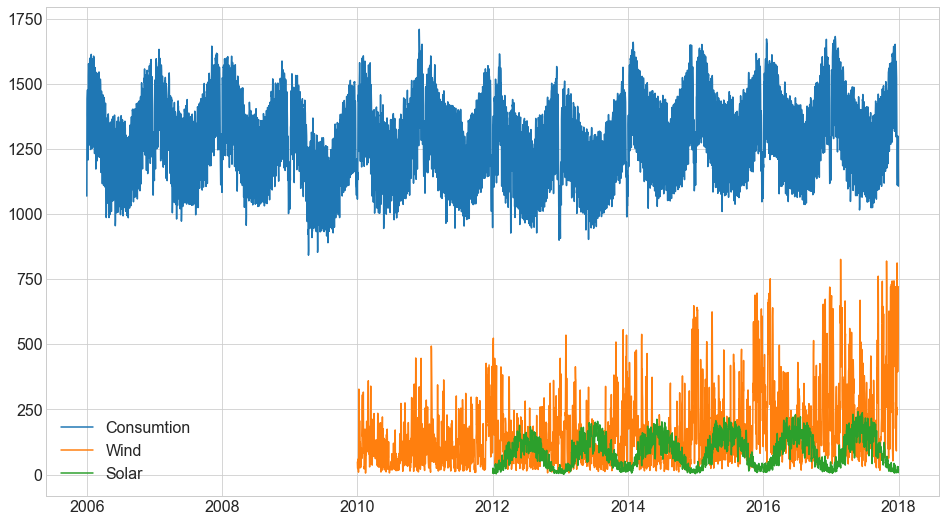

In [55]:
plt.figure(figsize=(16,9))

plt.plot(power.Consumption, label='Consumtion')
plt.plot(power.Wind, label='Wind')
plt.plot(power.Solar, label='Solar')
plt.legend()

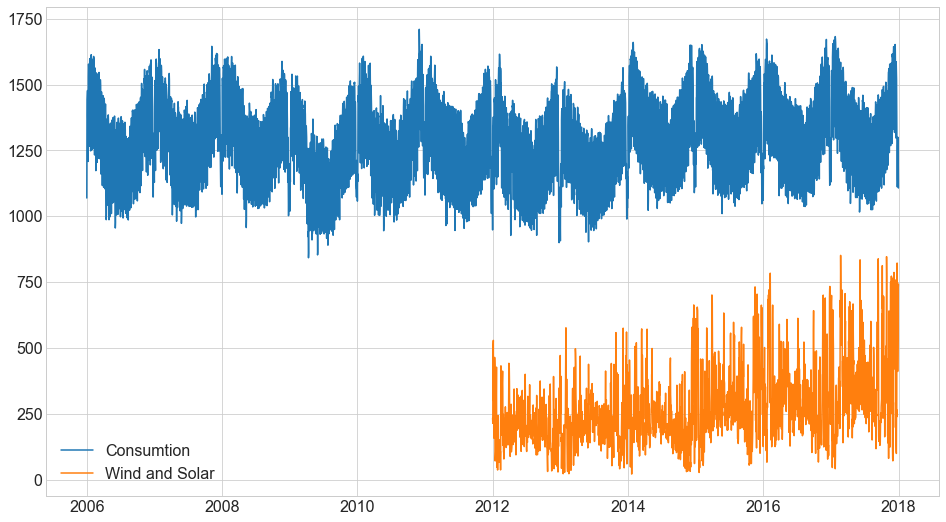

In [54]:
plt.figure(figsize=(16,9))

plt.plot(power.Consumption, label='Consumtion')
plt.plot(power['Wind+Solar'], label='Wind and Solar')
plt.legend()

### Split your data into train and test using the percent cutoff method.